In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline

import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf  # Connects Plotly to Pandas

from plotly.offline import download_plotlyjs, init_notebook_mode, plot
init_notebook_mode(connected=True)
cf.go_offline()

import requests
from bs4 import BeautifulSoup
import json
from pandas import DataFrame as df

In [7]:
# Grab data from URL

web_page = requests.get('https://www.worldometers.info/coronavirus/')
soup = BeautifulSoup(web_page.text, 'html.parser')
#print(soup.prettify())

In [19]:
# Basic covid data

covid_data = soup.find_all('div', class_='maincounter-number')
print("Coronavirus Cases: ", covid_data[0].text.strip())
print("Deaths: ", covid_data[1].text.strip())
print("Recovered: ", covid_data[2].text.strip())


Coronavirus Cases:  198,072,708
Deaths:  4,225,437
Recovered:  178,962,034


In [22]:
data = soup.find_all('script', {'type': 'text/javascript'})
# for content in data:
#   print(content)

In [24]:
results = soup.find(id='main_table_countries_today')
content = results.find_all('td')
#content

In [28]:
clean_data = ''
for data in content:
  clean_data += data.text.strip() + "|"
  clean_data = clean_data.replace('+', '')
  clean_data = clean_data.replace('N/A', '0')
clean_data

'|North America|42,501,002|21,900|939,941|516|35,322,452|12,453|6,238,609|16,381||||||North America||||||||Asia|61,835,550|54,159|892,837|586|57,893,789|42,259|3,048,924|33,569||||||Asia||||||||South America|35,474,544||1,088,393||32,993,513||1,392,638|25,538||||||South America||||||||Europe|51,426,136|27,492|1,133,049|820|46,799,707|22,143|3,493,380|7,803||||||Europe||||||||Africa|6,729,771|2|169,666||5,874,380|1|685,725|4,266||||||Africa||||||||Oceania|104,984|1,373|1,536|7|77,487|560|25,961|111||||||Australia/Oceania|||||||||721||15||706||0|0||||||||||||||World|198,072,708|104,926|4,225,437|1,929|178,962,034|77,416|14,885,237|87,668|25,411|542.1||||All|||||||1|USA|35,688,506||629,064||29,652,038||5,407,404|9,334|107,143|1,889|529,178,910|1,588,681|333,093,143|North America|9|530|1|||16,234|2|India|31,613,993|1,199|423,842||30,781,263|7,708|408,888|8,944|22,669|304|466,427,038|334,451|1,394,605,426|Asia|44|3,290|3|0.9||293|3|Brazil|19,880,273||555,512||18,595,380||729,381|8,318|92,81

In [29]:
# Cleaning up with Regex
import re

countries = [
    'usa', 'spain', 'italy', 'france', 'germany', 'uk', 'turkey', 'iran', 
    'russia', 'brazil', 'canada', 'belgium', 'netherlands', 'switzerland', 
    'india', 'peru', 'portugal', 'ecuador', 'ireland', 'sweden', 'saudi-arabia', 
    'israel', 'austria', 'mexico', 'singapore', 'japan', 'chile', 'pakistan', 
    'poland', 'romania', 'belarus', 'qatar', 'south-korea', 'united-arab-emirates', 
    'indonesia', 'ukraine', 'denmark', 'serbia', 'philippines', 'norway', 
    'czech-republic', 'australia', 'dominican-republic', 'bangladesh', 'malaysia', 
    'panama', 'colombia', 'finland', 'south-africa', 'egypt', 'morocco', 'argentina', 
    'luxembourg', 'moldova', 'algeria', 'kuwait', 'thailand', 'kazakhstan', 
    'bahrain', 'hungary', 'greece', 'oman', 'croatia', 'uzbekistan', 'iraq', 
    'armenia', 'iceland', 'afghanistan', 'estonia', 'azerbaijan', 'cameroon', 
    'bosnia-and-herzegovina', 'ghana', 'new-zealand', 'lithuania', 'slovenia', 
    'macedonia', 'slovakia', 'cuba', 'bulgaria', 'nigeria', 'cote-d-ivoire', 
    'china-hong-kong-sar', 'djibouti', 'guinea', 'bolivia', 'tunisia', 'latvia', 
    'cyprus', 'andorra', 'albania', 'lebanon', 'niger', 'kyrgyzstan', 'costa-rica', 
    'senegal', 'honduras', 'burkina-faso', 'uruguay', 'sri-lanka', 'san-marino', 
    'channel-islands', 'guatemala', 'georgia', 'democratic-republic-of-the-congo', 
    'malta', 'jordan', 'somalia', 'taiwan', 'reunion', 'mayotte', 'mali', 'kenya', 
    'jamaica', 'state-of-palestine', 'mauritius', 'venezuela', 'el-salvador', 
    'montenegro', 'isle-of-man', 'tanzania', 'viet-nam', 'equatorial-guinea', 
    'sudan', 'paraguay', 'maldives', 'congo', 'rwanda', 'faeroe-islands', 'gabon', 
    'martinique', 'guadeloupe', 'myanmar', 'gibraltar', 'brunei-darussalam', 
    'liberia', 'ethiopia', 'madagascar', 'cambodia', 'trinidad-and-tobago', 
    'french-guiana', 'bermuda', 'cabo-verde', 'aruba', 'togo', 'monaco', 
    'sierra-leone', 'zambia', 'liechtenstein', 'bahamas', 'barbados', 'uganda', 
    'mozambique', 'sint-maarten', 'guyana', 'haiti', 'cayman-islands', 'benin', 
    'libya', 'swaziland', 'french-polynesia', 'guinea-bissau', 'nepal', 'chad', 
    'china-macao-sar', 'syria', 'eritrea', 'saint-martin', 'mongolia', 'malawi', 
    'zimbabwe', 'angola', 'antigua-and-barbuda', 'timor-leste', 'botswana', 
    'central-african-republic', 'laos', 'belize', 'fiji', 'grenada', 'new-caledonia', 
    'curacao', 'dominica', 'namibia', 'saint-kitts-and-nevis', 'saint-lucia', 
    'saint-vincent-and-the-grenadines', 'nicaragua', 'falkland-islands-malvinas', 
    'burundi', 'montserrat', 'turks-and-caicos-islands', 'greenland', 'seychelles', 
    'gambia', 'suriname', 'holy-see', 'papua-new-guinea', 'mauritania', 'bhutan', 
    'british-virgin-islands', 'saint-barthelemy', 'south-sudan', 'western-sahara', 
    'caribbean-netherlands', 'sao-tome-and-principe', 'anguilla', 'saint-pierre-and-miquelon', 
    'yemen', 'china'
]

for c in countries:
  pattern = c + '[,|\d]*'
  data = re.search(pattern, clean_data, re.IGNORECASE)
  if data is not None:
    print(data.group())

USA|35,688,506||629,064||29,652,038||5,407,404|9,334|107,143|1,889|529,178,910|1,588,681|333,093,143|
Spain|4,447,044||81,486||3,711,200||654,358|1,698|95,075|1,742|55,855,941|1,194,159|46,774,302|
Italy|4,343,519||128,047||4,132,510||82,962|201|71,953|2,121|77,279,334|1,280,181|60,365,948|
France|6,103,548||111,824||5,696,559||295,165|1,072|93,285|1,709|104,074,220|1,590,639|65,429,176|
Germany|3,774,905||92,161||3,653,300|1,400|29,444|350|44,901|1,096|67,083,026|797,918|84,072,622|
UK|5,830,774||129,583||4,498,089||1,203,102|869|85,407|1,898|244,114,700|3,575,718|68,270,129|
Turkey|5,704,713||51,253||5,449,253||204,207|543|66,866|601|67,609,655|792,466|85,315,528|
Iran|3,851,162||90,344||3,348,363||412,455|5,384|45,228|1,061|25,857,430|303,672|85,149,163|
Russia|6,265,873|23,807|158,563|792|5,608,619|19,771|498,691|2,300|42,916|1,086|165,300,000|1,132,177|146,001,924|
Brazil|19,880,273||555,512||18,595,380||729,381|8,318|92,818|2,594|55,034,721|256,948|214,186,368|
Canada|1,430,483||

In [30]:
# Analyzing Covid in detail

# Working with csv data

owid_df = pd.read_csv('owid-covid-data.csv')
owid_df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [33]:
# Placing unique country names inside dataframe
country_df = owid_df.location.unique()
country_df.size

231

In [36]:
indexer = owid_df[owid_df['location'] == 'United States'].index
us_tc = owid_df.loc[indexer, 'date': 'total_cases']
us_tc = us_tc.dropna()
us_tc.set_index('date', inplace=True)
us_tc

,total_cases
date,
2020-01-22,1.0
2020-01-23,1.0
2020-01-24,2.0
2020-01-25,2.0
2020-01-26,5.0
...,...
2021-07-26,34533179.0
2021-07-27,34603919.0
2021-07-28,34672690.0


In [37]:
indexer = owid_df[owid_df['location'] == 'Croatia'].index
cr_tc = owid_df.loc[indexer, 'date': 'total_cases']
cr_tc = cr_tc.dropna()
cr_tc.set_index('date', inplace=True)
cr_tc

,total_cases
date,
2020-02-25,1.0
2020-02-26,3.0
2020-02-27,3.0
2020-02-28,5.0
2020-02-29,6.0
...,...
2021-07-26,362648.0
2021-07-27,362841.0
2021-07-28,363039.0


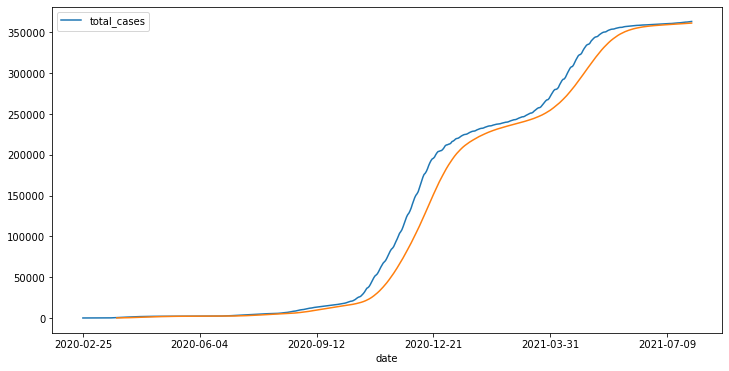

In [39]:
cr_tc.plot(figsize=(12,6))
cr_tc.rolling(window=30).mean()['total_cases'].plot()

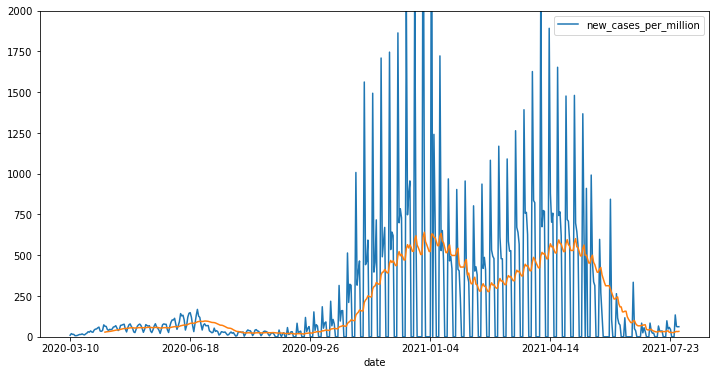

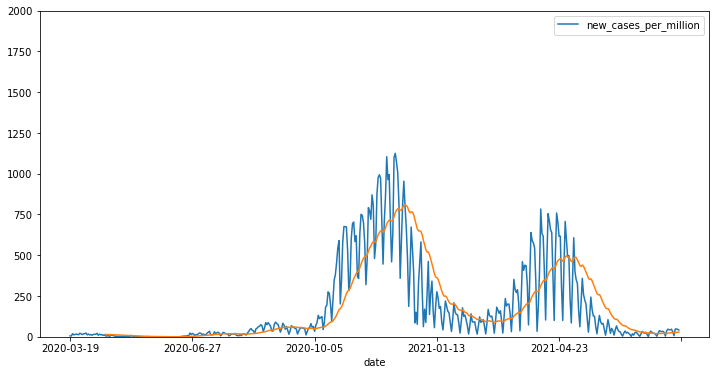

In [43]:
# Do locdowns work

def plot_covid_data(country, col, plot_ma=False, y_max=2000):
  indexer = owid_df[owid_df['location'] == country].index
  country_df = owid_df.loc[indexer, 'date': col]
  country_df = country_df.dropna()
  country_df.set_index('date', inplace=True)
  country_df.drop(country_df.columns.difference([col]), 1, inplace=True)
  country_df.plot(figsize=(12, 6), ylim=[0, y_max])


  if plot_ma:
    country_df.rolling(window=30).mean()[col].plot()

plot_covid_data('Sweden', 'new_cases_per_million', True)
plot_covid_data('Croatia', 'new_cases_per_million', True)

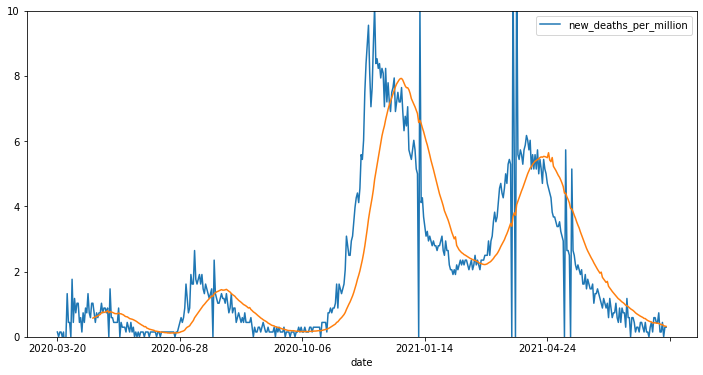

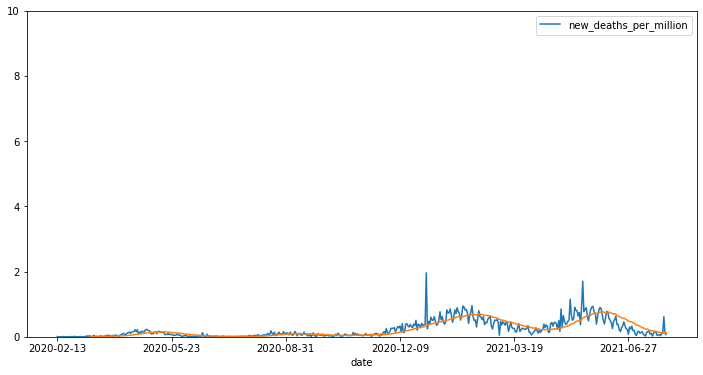

In [46]:
# How does median age effect death rate
plot_covid_data('Serbia', 'new_deaths_per_million', True, 10)
plot_covid_data('Japan', 'new_deaths_per_million', True, 10)

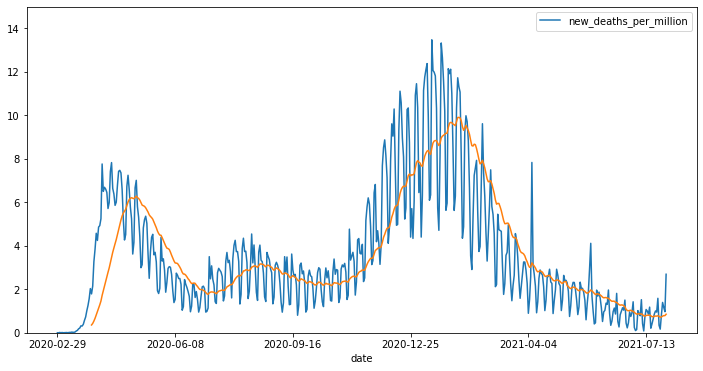

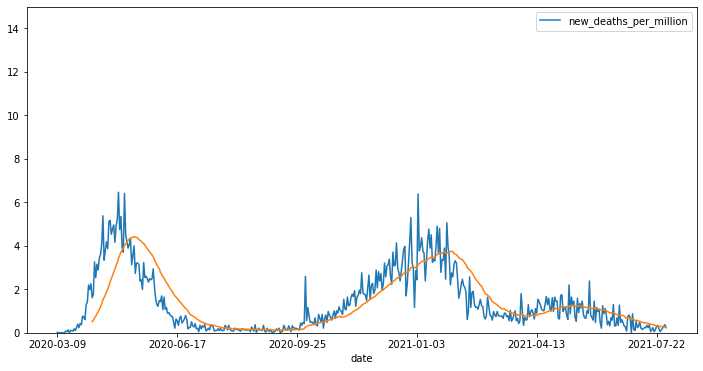

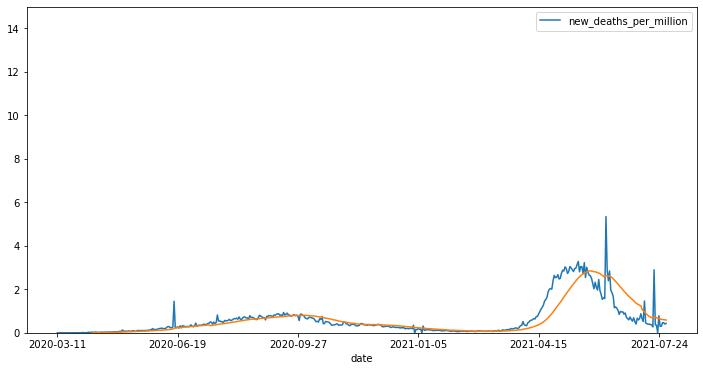

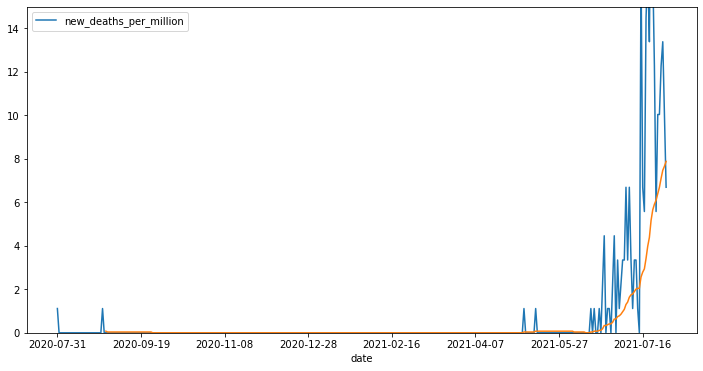

In [50]:
# How does obesity effect death rate
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Canada', 'new_deaths_per_million', True, 15)
plot_covid_data('India', 'new_deaths_per_million', True, 15)
plot_covid_data('Fiji', 'new_deaths_per_million', True, 15)

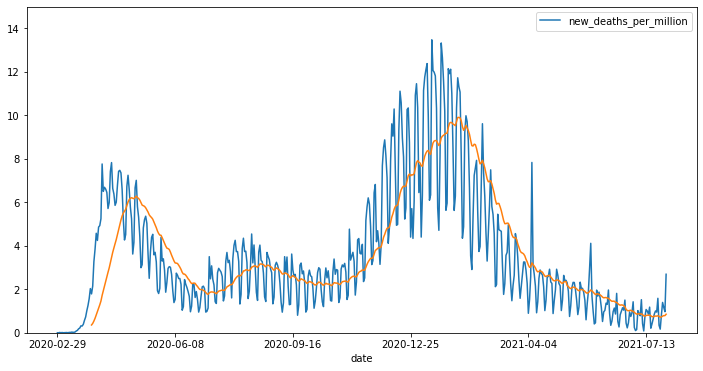

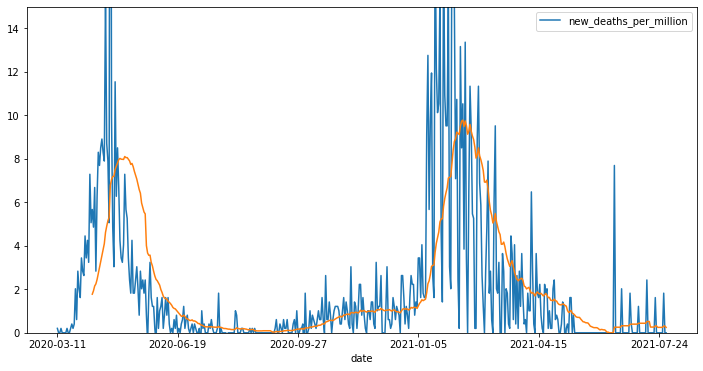

In [51]:
# How does diabetes prevalence effect death
plot_covid_data('United States', 'new_deaths_per_million', True, 15)
plot_covid_data('Ireland', 'new_deaths_per_million', True, 15)


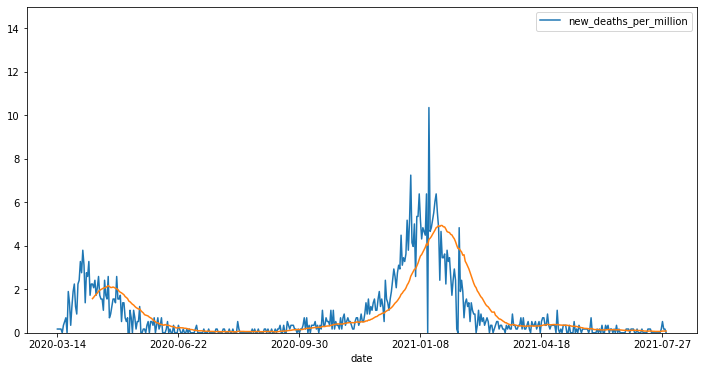

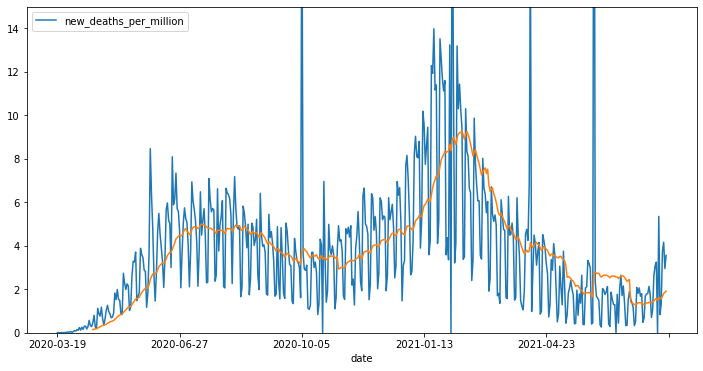

In [52]:
# How does testing slow deathrate
plot_covid_data('Denmark', 'new_deaths_per_million', True, 15)
plot_covid_data('Mexico', 'new_deaths_per_million', True, 15)



In [54]:
def scatter_plot(date, col1, col2):
  total_df = pd.DataFrame(columns=['date', 'location', col1, col2])
  for c in country_df:
    temp_df = owid_df[(owid_df['location'] == c) & (owid_df['date'] == date)][['date', 'location', col1, col2]]
    total_df = total_df.append(temp_df, ignore_index=True).fillna(0)
  
  total_df.set_index('date', inplace=True)

  fig = px.scatter(data_frame=total_df, x=col2, y=col1, color='location', trendline='ols', hover_data=['location'])
  fig.show()
  return total_df

scatter_plot('2021-07-30', 'total_deaths_per_million', 'aged_70_older')

,location,total_deaths_per_million,aged_70_older
date,,,
2021-07-30,Afghanistan,171.520,1.337
2021-07-30,Africa,126.224,0.000
2021-07-30,Albania,853.777,8.643
2021-07-30,Algeria,96.212,3.857
2021-07-30,Andorra,1656.636,0.000
...,...,...,...
2021-07-30,Vietnam,11.927,4.718
2021-07-30,World,539.917,5.355
2021-07-30,Yemen,46.101,1.583
